## Atividade
### O oscilador harmônico em 1D

É um sistema mecânico cujos movimentos seguem uma equação diferencial com coeficientes constantes seja uma massa numa mola. Para simplificar ainda mais o problema vamos considerar que massa e mola se encontram no plano horizontal, logo desconsideramos a força gravitacional, conforme a figura,
  

<img src="Figs/massamola1.png" width=40% >

A equação de movimento está dada por:

$$ {\bf F} = m {\bf a} = - k {\bf x} $$

Onde $k$ é a constante de rigidez da mola.  A equação acima é uma equação diferencial unidimensional. Essa equação pode ser escrita da seguinte forma:

$$ m \frac{d^2x}{dt^2} = -k x $$


Esta é a equação que descreve o movimento do oscilador harmônico.  Considerando $\omega_0 = k/m$, temos

$$ \frac{d^2x}{dt^2} + \omega_0 x = 0 $$

Devido a que a equação tem termos na segunda derivada, para encontrar uma solução à equação precisamos conhecer condições iniciais para

\begin{eqnarray}
x (t = 0) &=& x_0 \\
\frac{dx}{dt} (t = 0) &=& v_0
\end{eqnarray}

Vamos resolver essa equação de duas formas, usando o módulo sympy, que permite fazer matemática simbolica, e usando o esquema numérico estudado na aula anterior. 


### Solução analitica usando o módulo sympy

Sympy provee um modulo para resolver simbolicamente EDO. 
[http://docs.sympy.org/dev/modules/solvers/ode.html](http://docs.sympy.org/dev/modules/solvers/ode.html)


In [3]:
import sympy
sympy.init_printing()

Inicialmente definimos nossos simbolos e funções

In [4]:
m, k, x_0, v_0, omega_0, t = sympy.symbols('m, k, x_0, v_0, omega_0, t')
x = sympy.Function('x')

Agora usamos a função `dsolve` pertencente a `sympy` para obter a solução analítica da equação.

In [7]:
sol = sympy.dsolve(sympy.Derivative(x(t), t, 2) + omega_0 * x(t))
sol

Como apontado anteriormente precisamos condições iniciais para encontrar os coeficientes $C_1$ e $C_2$

In [8]:
ics = [sympy.Eq(sol.args[1].subs(t, 0), x_0), sympy.Eq(sol.args[1].diff(t).subs(t, 0), v_0)]
ics

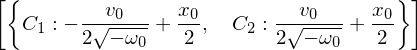

In [9]:
solved_ics = sympy.solve(ics)
solved_ics

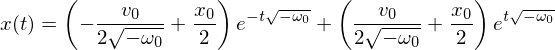

In [10]:
full_sol = sol.subs(solved_ics[0])
full_sol

A equação acima é a solução da equação diferencial. Vejamos a evolução do sistema com duas condições iniciais diferentes:

* caso 1: $x_0 = 1$, $v_0 = 0$, $\Omega_0 = 1$
* caso 2: $x_0 = 0$, $v_0 = 1$, $\Omega_0 = 1$

In [12]:
caso1 = sympy.simplify(full_sol.subs({x_0:1, v_0:0, omega_0:1}))
caso1

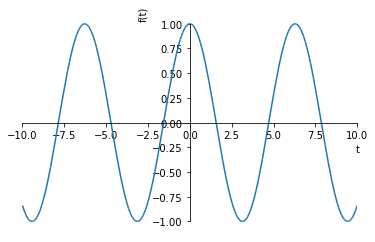

In [13]:
%matplotlib inline
sympy.plot(caso1.rhs)

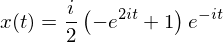

In [16]:
caso2 = sympy.simplify(full_sol.subs({x_0:0, v_0:1, omega_0:1}))
caso2

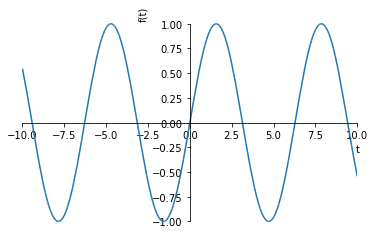

In [18]:
sympy.plot(caso2.rhs)

## Exercícios

Utilizar `sympy` é útil em situações simples.  Mas pode chegar a ser mais dificil
se a física é mais complexa, e.g., força de atrito.  Resolver o problema de forma numérica é bem mais simples que usar `sympy`, porem pode levar a erros de precisão numérica como visto anteriormente.  

1. Utilize o método de diferências finitas centrais para resolver a equação do oscilador harmônico.  Utilize as condições iniciais para os casos 1 e 2 acima. Grafique $x$ vs $t$ e 
$v$ vs $t$.  Discuta seus resultados.
2. Para o `caso 1` compare o resultado numérico com o resultado analítico calculando o erro específico, dessa forma encontrando o valor de $dt$ que representa a melhor precisão. Discuta os resultados
3. Calcule a energia cinética, $E_k = m v^2/2$, a energia potencial, $U = kx^2/2$, e a energia total, $E = E_k + U$.  Discuta os resultados.

